In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_hongos = pd.read_csv("/content/drive/MyDrive/datosTP2/files/MushroomDataset/secondary_data.csv", delimiter=";")

In [4]:
df_hongos

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [5]:
df_hongos.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

##**Stacked Bar Plot**

In [6]:
df_cantidades_por_color_y_clase = df_hongos.groupby(['class', 'cap-color']).size().reset_index(name='cantidad')

In [7]:
df_cantidades_por_color_y_clase.head(3)

,class,cap-color,cantidad
0,e,b,974
1,e,e,880
2,e,g,2297


In [8]:
datos_totales_por_color = df_cantidades_por_color_y_clase.groupby(["cap-color"]).agg( { "cantidad": ["sum"] } )
datos_totales_por_color.columns = ["total_por_color"]
datos_totales_por_color.head(3)

,total_por_color
cap-color,
b,1230
e,4035
g,4420


In [9]:
df_cantidades_por_color_y_clase = df_cantidades_por_color_y_clase.merge(datos_totales_por_color, on="cap-color", how="left")

In [10]:
df_cantidades_por_color_y_clase.head(3)

,class,cap-color,cantidad,total_por_color
0,e,b,974,1230
1,e,e,880,4035
2,e,g,2297,4420


In [11]:
df_cantidades_por_color_y_clase["porcentaje_por_color"] = ( df_cantidades_por_color_y_clase["cantidad"] / df_cantidades_por_color_y_clase["total_por_color"] ) * 100

In [12]:
df_cantidades_por_color_y_clase.head(3)

,class,cap-color,cantidad,total_por_color,porcentaje_por_color
0,e,b,974,1230,79.186992
1,e,e,880,4035,21.809170
2,e,g,2297,4420,51.968326


Text(0.5, 1.0, 'Porcentaje de hongos comestibles (e) o venenosos (p) según el color de la cabeza')

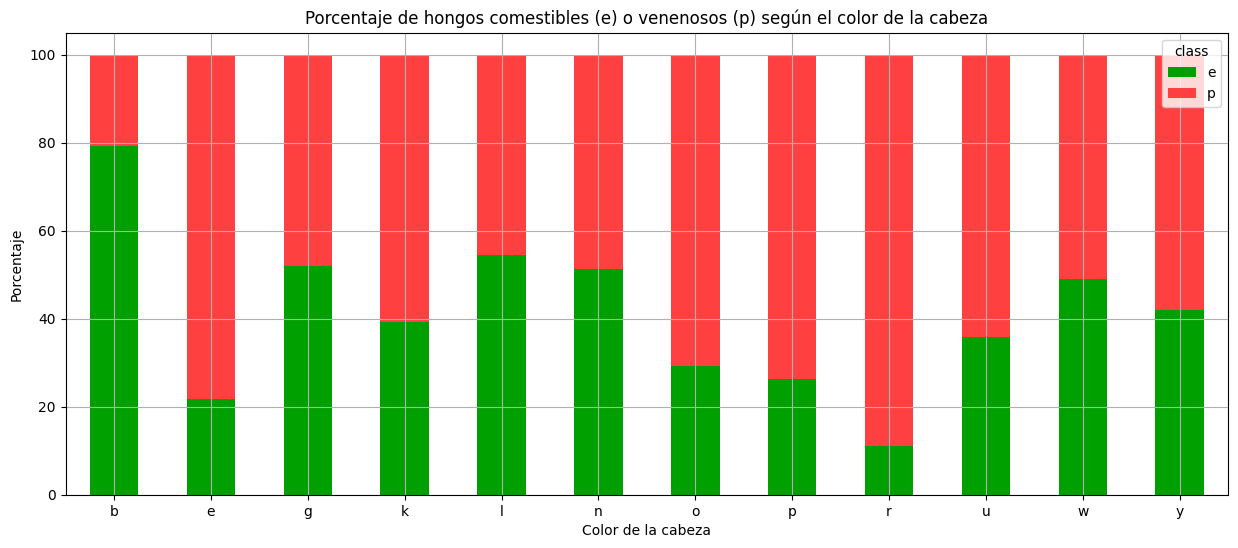

In [16]:
fig, ax = plt.subplots( figsize=(15,6) )

datos = df_cantidades_por_color_y_clase.pivot_table( index="cap-color", columns="class", values="porcentaje_por_color")

grafico = datos.plot(kind='bar', stacked=True, color=['#00a000', '#ff4040'], grid=True, ax=ax)
plt.xticks(rotation='horizontal')

grafico.set_xlabel("Color de la cabeza")
grafico.set_ylabel("Porcentaje")

plt.title("Porcentaje de hongos comestibles (e) o venenosos (p) según el color de la cabeza")

##**Violin Plot**

Text(0.5, 1.0, 'Ancho del tallo de un hongo según clase (venenoso: p, comestible: e).')

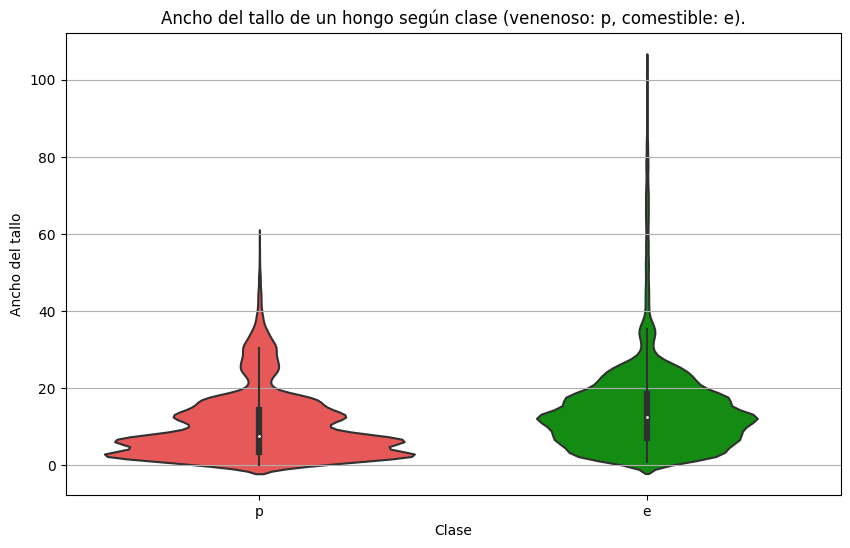

In [17]:
fig, ax = plt.subplots( figsize=(10,6) )
ax.grid()

grafico = sns.violinplot( x=df_hongos["class"], y=df_hongos["stem-width"], palette={"e": "#00a000", "p": "#ff4040"}, ax=ax )

grafico.set_xlabel("Clase")
grafico.set_ylabel("Ancho del tallo")
plt.title("Ancho del tallo de un hongo según clase (venenoso: p, comestible: e).")

##**Box plot**

Text(0.5, 1.0, 'Clase de un hongo (venenoso: p, comestible: e) según ancho del tallo y estación de crecimiento.')

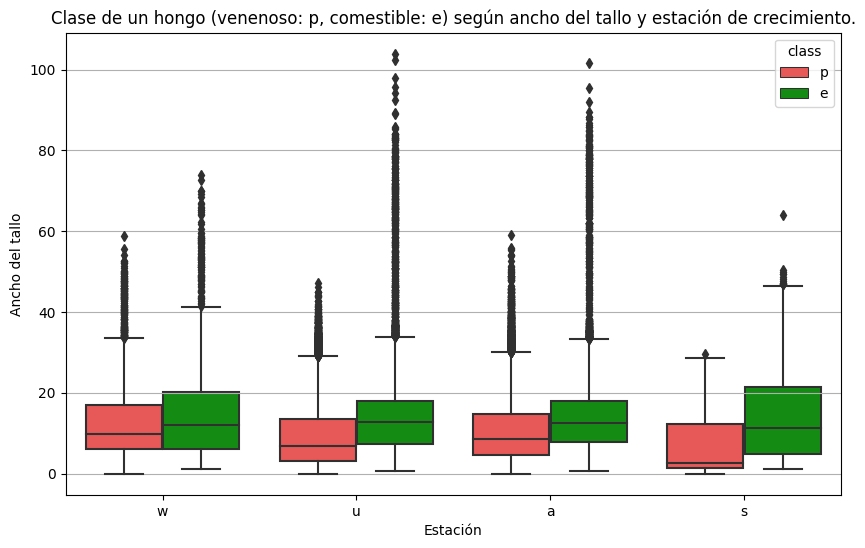

In [18]:
fig, ax = plt.subplots( figsize=(10,6) )
ax.grid()

grafico = sns.boxplot( x=df_hongos["season"], y=df_hongos["stem-width"], hue=df_hongos["class"], palette={"e": "#00a000", "p": "#ff4040"}, ax=ax )

grafico.set_xlabel("Estación")
grafico.set_ylabel("Ancho del tallo")
plt.title("Clase de un hongo (venenoso: p, comestible: e) según ancho del tallo y estación de crecimiento.")

##**Heatmap**

In [36]:
df_venenosos_por_color_y_estacion = df_hongos.loc[ df_hongos["class"] == 'p' ].groupby(['class', 'cap-color', 'season']).size().reset_index(name='cantidad')

In [37]:
df_venenosos_por_color_y_estacion.head(3)

,class,cap-color,season,cantidad
0,p,b,a,145
1,p,b,u,111
2,p,e,a,1950


In [38]:
cantidad_por_color_y_estacion = df_hongos.groupby(['cap-color', 'season']).size().reset_index(name='total_color')
cantidad_por_color_y_estacion.head(3)

,cap-color,season,total_color
0,b,a,785
1,b,u,175
2,b,w,270


In [39]:
df_venenosos_por_color_y_estacion = df_venenosos_por_color_y_estacion.merge(cantidad_por_color_y_estacion, on=["cap-color", "season"], how="left")

In [40]:
df_venenosos_por_color_y_estacion.head(3)

,class,cap-color,season,cantidad,total_color
0,p,b,a,145,785
1,p,b,u,111,175
2,p,e,a,1950,2337


In [41]:
df_venenosos_por_color_y_estacion["porcentaje_por_color"] = ( df_venenosos_por_color_y_estacion["cantidad"] / df_venenosos_por_color_y_estacion["total_color"] ) * 100

In [42]:
df_venenosos_por_color_y_estacion.head(3)

,class,cap-color,season,cantidad,total_color,porcentaje_por_color
0,p,b,a,145,785,18.471338
1,p,b,u,111,175,63.428571
2,p,e,a,1950,2337,83.440308


Text(0.5, 1.0, 'Porcentaje de hongos que son venenosos según estación de crecimiento y color de la cabeza')

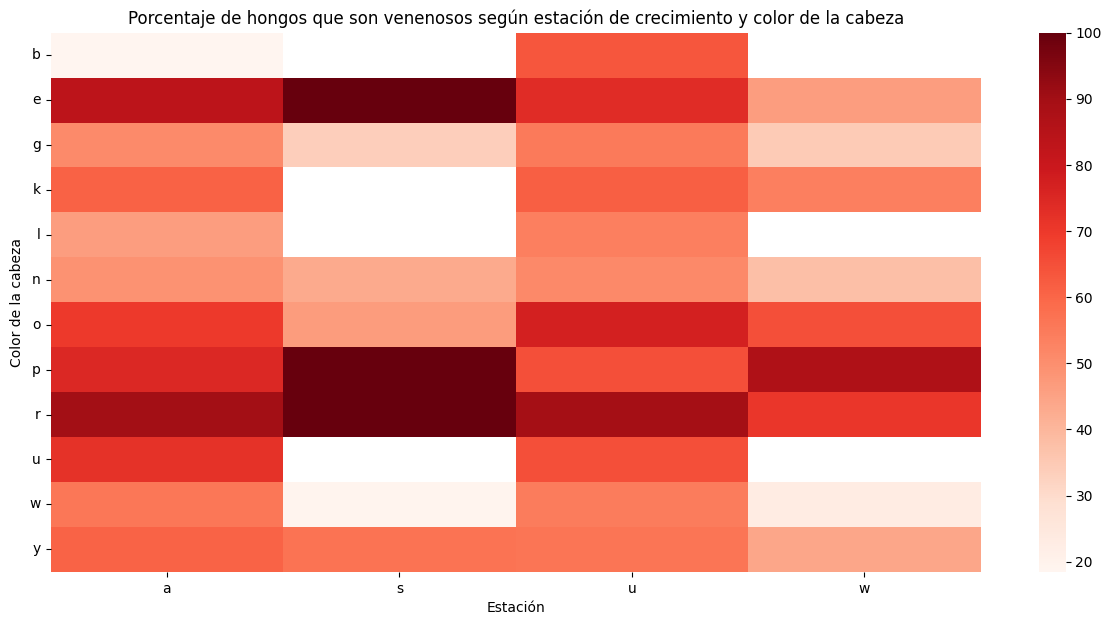

In [44]:
fig, ax = plt.subplots( figsize=(15,7) )

datos = df_venenosos_por_color_y_estacion.pivot_table( index="cap-color", columns="season", values="porcentaje_por_color" )

grafico = sns.heatmap( datos, cmap="Reds", ax=ax )
plt.yticks(rotation='horizontal')

grafico.set_xlabel("Estación")
grafico.set_ylabel("Color de la cabeza")
plt.title("Porcentaje de hongos que son venenosos según estación de crecimiento y color de la cabeza")

##**Lollipop chart**

In [46]:
df_venenosos_segun_tacto = df_hongos.loc[ df_hongos["class"] == 'p' ].groupby(['class', 'cap-surface']).size().reset_index(name='cantidad')

In [47]:
df_venenosos_segun_tacto.head(3)

,class,cap-surface,cantidad
0,p,d,2383
1,p,e,1348
2,p,g,2760


In [48]:
total_hongos_por_superficie_al_tacto = df_hongos.groupby(["cap-surface"]).size().reset_index(name='total_por_tipo_superficie')

In [ ]:
total_hongos_por_superficie_al_tacto.head(3)

,cap-surface,total_por_tipo_superficie
0,d,4432
1,e,2584
2,g,4724


In [49]:
df_venenosos_segun_tacto = df_venenosos_segun_tacto.merge(total_hongos_por_superficie_al_tacto, on="cap-surface", how="left")

In [51]:
df_venenosos_segun_tacto["porcentaje_del_total"] = (df_venenosos_segun_tacto["cantidad"] / df_venenosos_segun_tacto["total_por_tipo_superficie"]) * 100

In [52]:
df_venenosos_segun_tacto

,class,cap-surface,cantidad,total_por_tipo_superficie,porcentaje_del_total
0,p,d,2383,4432,53.768051
1,p,e,1348,2584,52.167183
2,p,g,2760,4724,58.425064
3,p,h,2357,4974,47.386409
4,p,i,1856,2225,83.415730
5,p,k,2122,2303,92.140686
6,p,l,706,1412,50.000000
7,p,s,3270,7608,42.981073
8,p,t,5373,8196,65.556369
9,p,w,1288,2150,59.906977


Text(0.5, 1.0, 'Porcentaje de hongos que son venenosos según el tipo de superficie de su cabeza al tacto')

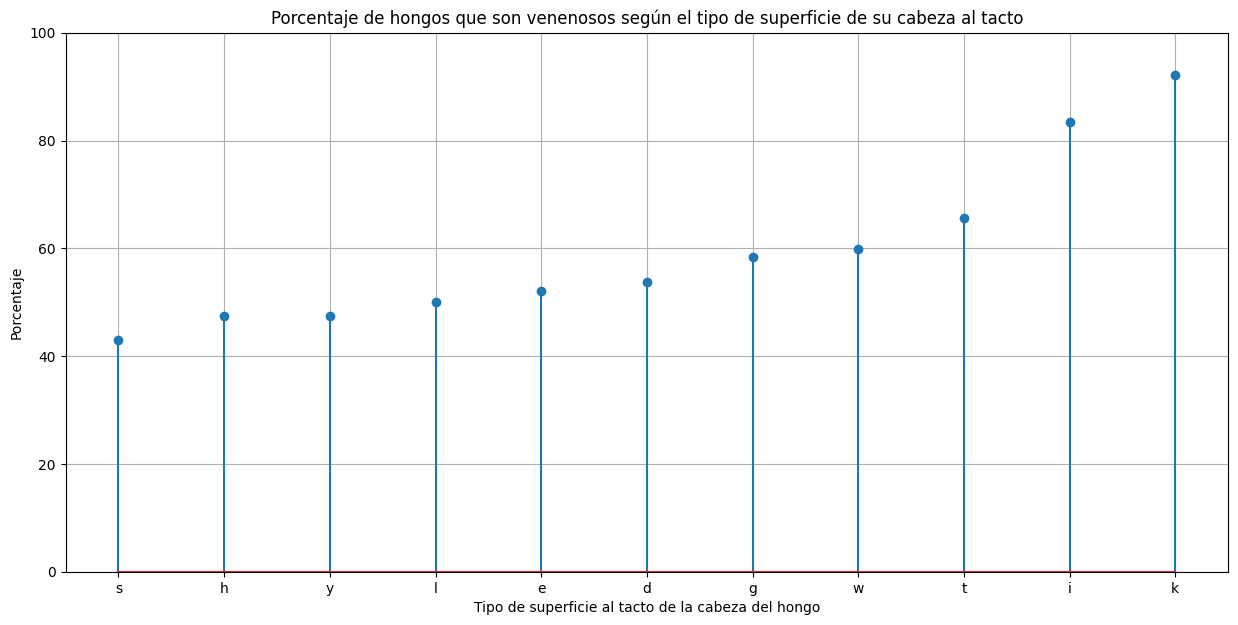

In [53]:
fig, ax = plt.subplots( figsize=(15,7) )
ax.grid()

ordered_df = df_venenosos_segun_tacto.sort_values(by='porcentaje_del_total')
my_range = range( len(df_venenosos_segun_tacto.index) )

plt.stem( ordered_df['porcentaje_del_total'] ) 
plt.xticks( my_range, ordered_df['cap-surface'])

plt.ylim( (0, 100) )
plt.xlabel("Tipo de superficie al tacto de la cabeza del hongo")
plt.ylabel("Porcentaje")
plt.title("Porcentaje de hongos que son venenosos según el tipo de superficie de su cabeza al tacto")